In [1]:
import sys
sys.path.append(sys.path[0] + '/deepkexpfam')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from utils import make_grid_data, plot_flow2D, plot_object2D
from flows import ObjectDataset, MLPLayers, AffineCouplingLayers, Flow

from Datasets import Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring

%matplotlib inline

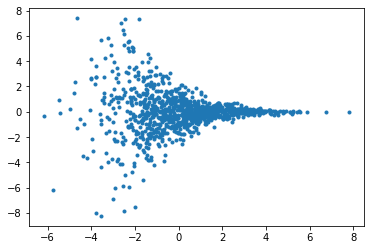

In [3]:
obj = Funnel()
X = obj.sample(1000)
plt.plot(X[:, 0], X[:, 1], '.')

In [4]:
# Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring
d = 1
D = 2
layers = 20
batch_size = 100
iterations = 10000
lr = 0.001
weight_decay = 0.01

names = ['Funnel', 'Banana', 'Ring', 'Uniform', 'Cosine', 'Grid', 'Multiring']
objs = [Funnel(), Banana(), Ring(), Uniform(), Cosine(), Grid(), Multiring()]

flows = []
for obj in objs:
    while True:
        try:
            flow = Flow(d, D, layers)
            flow.train(obj, batch_size, iterations, lr, weight_decay, show_progress=True)
            flows.append(flow)
        except ValueError:
            print('Value error')
        except RuntimeError:
            print('Runtime error')
        else:
            break

iterations = 1, log_like = -906.41895
iterations = 101, log_like = -355.13870
iterations = 201, log_like = -349.60361
iterations = 301, log_like = -322.37329
iterations = 401, log_like = -354.02124
iterations = 501, log_like = -357.86618
iterations = 601, log_like = -357.20398
iterations = 701, log_like = -340.05081
iterations = 801, log_like = -335.73676
iterations = 901, log_like = -341.06250
iterations = 1001, log_like = -354.40317
iterations = 1101, log_like = -345.89981
iterations = 1201, log_like = -339.54633
iterations = 1301, log_like = -334.14194
iterations = 1401, log_like = -364.27087
iterations = 1501, log_like = -341.71436
iterations = 1601, log_like = -342.53430
iterations = 1701, log_like = -341.39853
iterations = 1801, log_like = -336.00211
iterations = 1901, log_like = -356.84766
iterations = 2001, log_like = -350.50717
iterations = 2101, log_like = -345.15668
iterations = 2201, log_like = -333.34027
iterations = 2301, log_like = -347.07483
iterations = 2401, log_like 

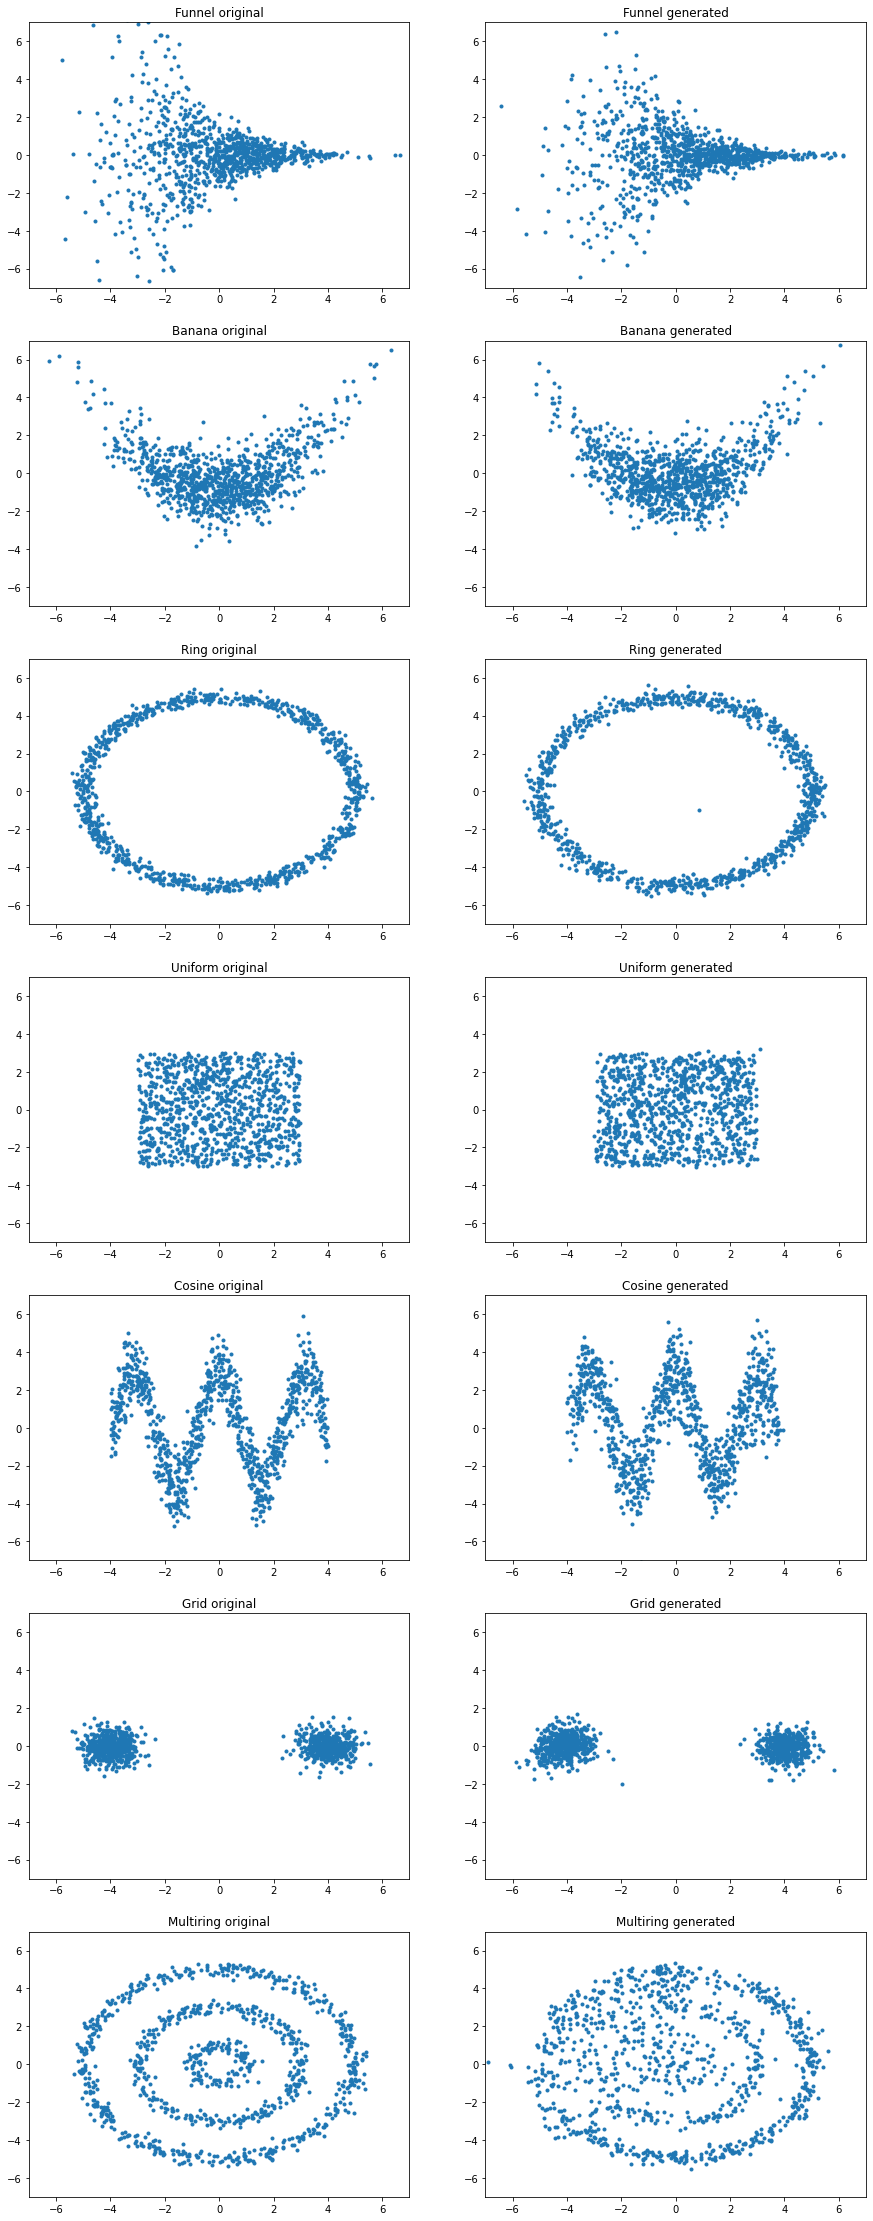

In [5]:
plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    X_obj = obj.sample(1000)
    
    plt.subplot(7, 2, 2*i+1)
    plt.plot(X_obj[:, 0], X_obj[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')

    X_flow = flow.sample(1000)

    plt.subplot(7, 2, 2*i+2)
    plt.plot(X_flow[:, 0], X_flow[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')

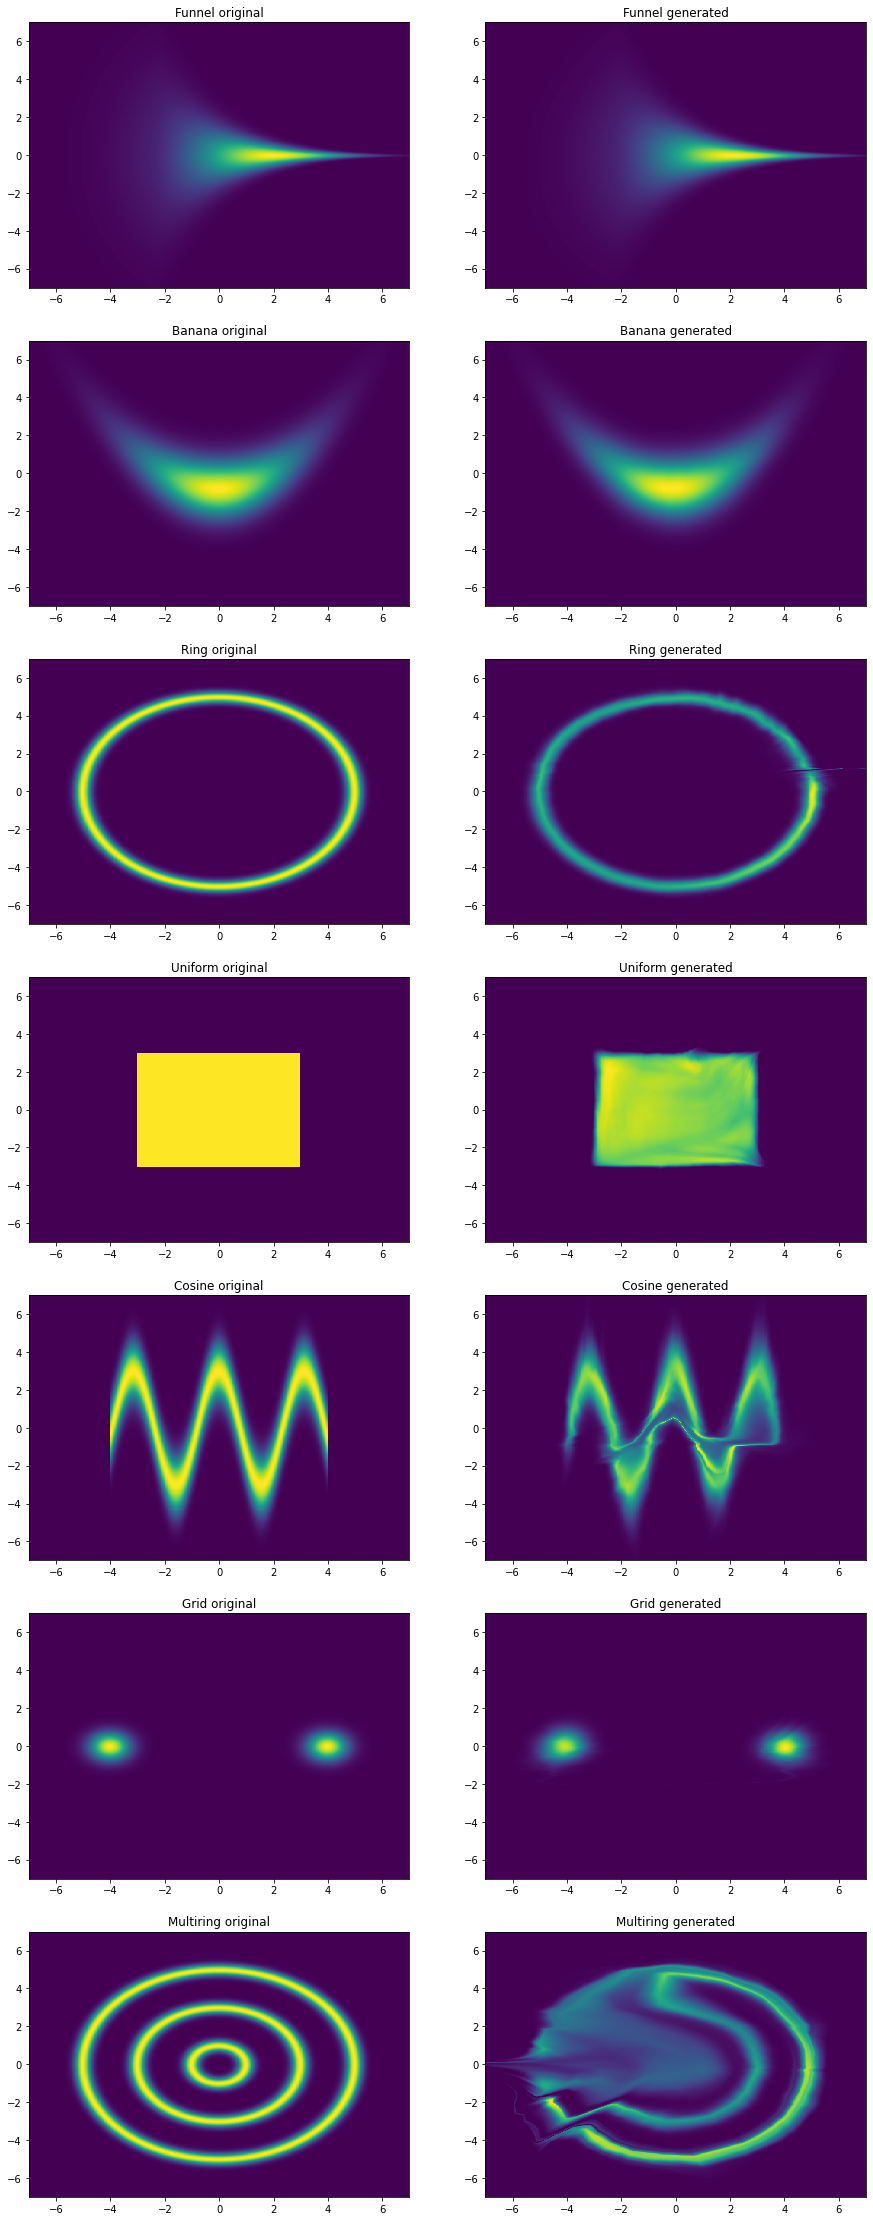

In [6]:
x_interval, y_interval = np.linspace(-7, 7, 500), np.linspace(-7, 7, 500)

plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    plt.subplot(7, 2, 2*i+1)
    plot_object2D(obj, x_interval, y_interval)
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')
    
    plt.subplot(7, 2, 2*i+2)
    plot_flow2D(flow, x_interval, y_interval)
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')